## CNN USING SVM FOR IMAGE CLASSIFICATION

In [1]:
import tensorflow as tf

### Initiating a command to use 50% of the GPU share memory

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Now we upload image data generator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\HP\\Anaconda3\\envs\\BB\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

### Use the ImageDataGenerator for data augumentation 

### The reason behind the augumentation of train data set is to add noise (systemaically or randomly alter the image) to increase the size of the data to make it robust enough to cover any aspect or possible ways the data could be generated. This will as well help our model to be trained enough to produce an outcome that incoporate different data from different possible ways

In [5]:
# Data Preprocessing

# Preprocessing the Training set

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

# Preparing the Test data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset/test',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Import two layer to create a plan neural network

In [7]:
from tensorflow.keras.layers import Conv2D  # for convolution operations
from tensorflow.keras.layers import Dense    # to add the node with respect to header list

In [8]:
from tensorflow.keras.regularizers import l2

### We create a CNN list

In [9]:
# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))    # to make it as linear SVM

In [11]:
## for mulitclassification
## cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))
## cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])   
# using the loss function as hinge is going to be consider as SVM

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

# using the loss function as hinge and regularizer made our final layer an SVM layer

Epoch 1/15
625/625 [==============================] - 183s 289ms/step - loss: 0.7807 - accuracy: 0.6277 - val_loss: 0.6778 - val_accuracy: 0.7136
Epoch 2/15
625/625 [==============================] - 138s 220ms/step - loss: 0.6258 - accuracy: 0.7072 - val_loss: 0.6581 - val_accuracy: 0.7526
Epoch 3/15
625/625 [==============================] - 122s 195ms/step - loss: 0.5782 - accuracy: 0.7292 - val_loss: 0.6229 - val_accuracy: 0.7646
Epoch 4/15
625/625 [==============================] - 126s 202ms/step - loss: 0.5420 - accuracy: 0.7485 - val_loss: 0.5041 - val_accuracy: 0.7750
Epoch 5/15
625/625 [==============================] - 136s 218ms/step - loss: 0.5195 - accuracy: 0.7538 - val_loss: 0.5492 - val_accuracy: 0.7874
Epoch 6/15
625/625 [==============================] - 120s 192ms/step - loss: 0.4958 - accuracy: 0.7703 - val_loss: 0.4602 - val_accuracy: 0.7928
Epoch 7/15
625/625 [==============================] - 127s 203ms/step - loss: 0.4816 - accuracy: 0.7720 - val_loss: 0.4534 -

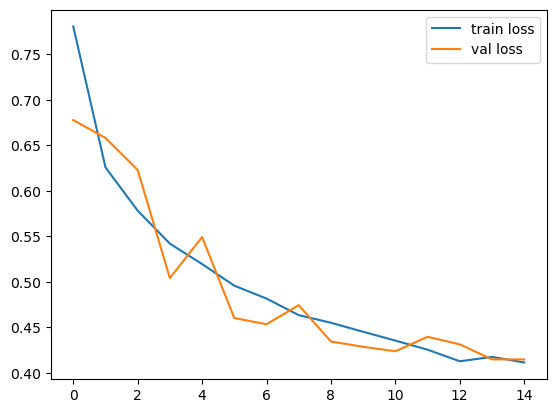

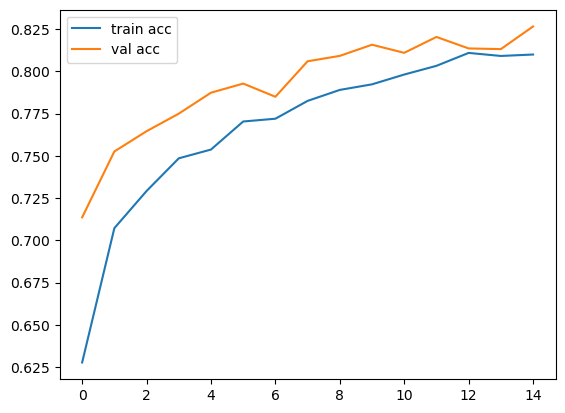

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [16]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Dataset/test/Dogs/dog.30.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 235ms/step


In [19]:
result

array([[2.053184]], dtype=float32)

In [20]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


### Also we need to test for a cat

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Dataset/test/Cats/cat.30.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [22]:
result

array([[-2.0375497]], dtype=float32)

In [23]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat
